In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# YOLOv5 setup (for detection)
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repo
%cd yolov5
%pip install -r requirements.txt  # install YOLOv5 dependencies

# Load YOLOv5 model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Paths to directories
tumor_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
healthy_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"

# Load metadata
metadata = pd.read_csv("D:/anaconda/metadata_rgb_only.csv")

# Load images and labels
def load_images_and_labels(metadata, tumor_dir, healthy_dir):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        if row['class'] == 'tumor':
            img_path = os.path.join(tumor_dir, row['image'])
        else:
            img_path = os.path.join(healthy_dir, row['image'])
        
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(299, 299))  # Resize to match InceptionV3 input
            img = img_to_array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(1 if row['class'] == 'tumor' else 0)
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(metadata, tumor_dir, healthy_dir)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load pretrained InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D to reduce dimensionality
x = Dense(512, activation='relu')(x)  # Suggested number of units
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)  # Additional Dense layer with fewer units
x = Dropout(0.5)(x)  # Additional Dropout layer
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Tumor'], yticklabels=['Healthy', 'Tumor'])
plt.title("Confusion Matrix")
plt.show()

# YOLOv5 detection (optional)
def run_yolo_detection(image_path):
    results = yolo_model(image_path)
    results.show()  # Display detection results

# Test YOLOv5 on a sample image (if needed)
sample_image_path = "D:/tumor.jpeg"
run_yolo_detection(sample_image_path)


[WinError 2] The system cannot find the file specified: 'yolov5'
C:\Users\Piyushi Labhe


fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --[no-]verbose    be more verbose
    -q, --[no-]quiet      be more quiet
    --[no-]progress       force progress reporting
    --[no-]reject-shallow don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --checkout            opposite of --no-checkout
    --[no-]bare           create a bare repository
    --[no-]mirror         create a mirror repository (implies --bare)
    -l, --[no-]local      to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    --hardlinks           opposite of --no-hardlinks
    -s, --[no-]shared     setup as shared repository
    --[no-]recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --[no-]recursive ...  alias of --recurse-submodules
    -j, --[no-]jobs <n>   number of submodules cloned in parallel
    --[no-]template <template-directory>
            

Note: you may need to restart the kernel to use updated packages.


NameError: name 'torch' is not defined

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import tensorflow as tf

# Load YOLOv9 model (assuming it's installed and you have weights locally)
from yolov9 import YOLOv9  # Importing YOLOv9 module

# Instantiate YOLOv9 with pretrained weights
yolo_model = YOLOv9(weights="path/to/yolov9/weights.pt")  # Replace with your path

# Paths to directories
tumor_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
healthy_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"

# Load metadata
metadata = pd.read_csv("D:/anaconda/metadata_rgb_only.csv")

# Load images and labels
def load_images_and_labels(metadata, tumor_dir, healthy_dir):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        if row['class'] == 'tumor':
            img_path = os.path.join(tumor_dir, row['image'])
        else:
            img_path = os.path.join(healthy_dir, row['image'])
        
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(299, 299))  
            img = img_to_array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(1 if row['class'] == 'tumor' else 0)
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(metadata, tumor_dir, healthy_dir)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Optional: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load pretrained InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, 
                         input_shape=(299, 299, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Healthy', 'Tumor'], yticklabels=['Healthy', 'Tumor'])
plt.title("Confusion Matrix")
plt.show()

# YOLOv9 detection (optional)
def run_yolo_detection(image_path):
    results = yolo_model.detect(image_path)  # Use YOLOv9's detection method
    results.show()  # Display detection results

# Test YOLOv9 on a sample image (if needed)
sample_image_path = "D:/tumor.jpeg"
run_yolo_detection(sample_image_path)


ImportError: cannot import name 'YOLOv9' from 'yolov9' (D:\my\Lib\site-packages\yolov9\__init__.py)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 152s 2us/step
Epoch 1/20


D:\my\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 803s 7s/step - accuracy: 0.6508 - loss: 0.8194 - val_accuracy: 0.8645 - val_loss: 0.3271
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/step - accuracy: 0.8006 - loss: 0.4186 - val_accuracy: 0.8869 - val_loss: 0.2720
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.8441 - loss: 0.3510 - val_accuracy: 0.8981 - val_loss: 0.2438
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - accuracy: 0.8551 - loss: 0.3302 - val_accuracy: 0.9127 - val_loss: 0.2170
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.8655 - loss: 0.3114 - val_accuracy: 0.9283 - val_loss: 0.1937
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.8869 - loss: 0.2777 - val_accuracy: 0.9496 - val_loss: 0.1607
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9117 - loss: 0.2310 - val_accuracy: 0.9451 - val_loss: 0.1582
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.8882 - loss: 0.2521 - val_accuracy: 0.942

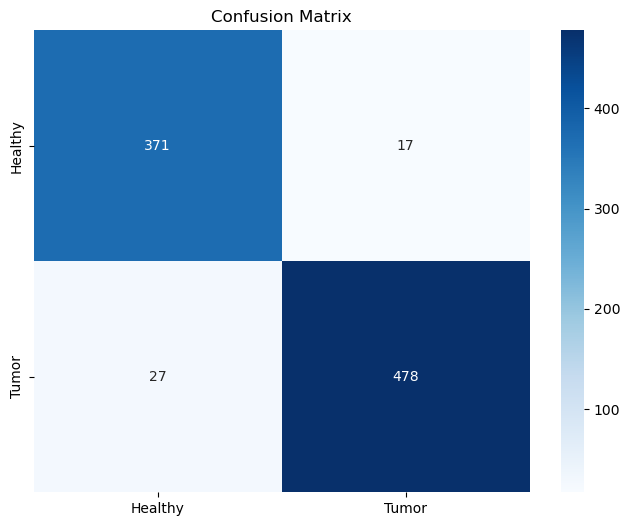

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Paths to directories
tumor_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
healthy_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"

# Load metadata
metadata = pd.read_csv("D:/anaconda/metadata_rgb_only.csv")

# Load images and labels
def load_images_and_labels(metadata, tumor_dir, healthy_dir):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        if row['class'] == 'tumor':
            img_path = os.path.join(tumor_dir, row['image'])
        else:
            img_path = os.path.join(healthy_dir, row['image'])
        
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(299, 299))  # Resize to match InceptionV3 input
            img = img_to_array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(1 if row['class'] == 'tumor' else 0)
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(metadata, tumor_dir, healthy_dir)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load pretrained InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D to reduce dimensionality
x = Dense(512, activation='relu')(x)  # Suggested number of units
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)  # Additional Dense layer with fewer units
x = Dropout(0.5)(x)  # Additional Dropout layer
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Tumor'], yticklabels=['Healthy', 'Tumor'])
plt.title("Confusion Matrix")
plt.show()


In [7]:
# After training the model, save it to a file
model.save('brain_tumor_classifier.h5')

NameError: name 'model' is not defined

Epoch 1/10


D:\my\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.6642 - loss: 0.7246 - val_accuracy: 0.8074 - val_loss: 0.4035
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.8109 - loss: 0.4082 - val_accuracy: 0.8679 - val_loss: 0.2995
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.8453 - loss: 0.3650 - val_accuracy: 0.8992 - val_loss: 0.2470
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.8598 - loss: 0.3436 - val_accuracy: 0.9160 - val_loss: 0.2312
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.8829 - loss: 0.2800 - val_accuracy: 0.9283 - val_loss: 0.2170
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.8861 - loss: 0.2807 - val_accuracy: 0.9384 - val_loss: 0.1825
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.8897 - loss: 0.2714 - val_accuracy: 0.9082 - val_loss: 0.2305
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.8857 - loss: 0.2704 - val_accuracy: 0.944

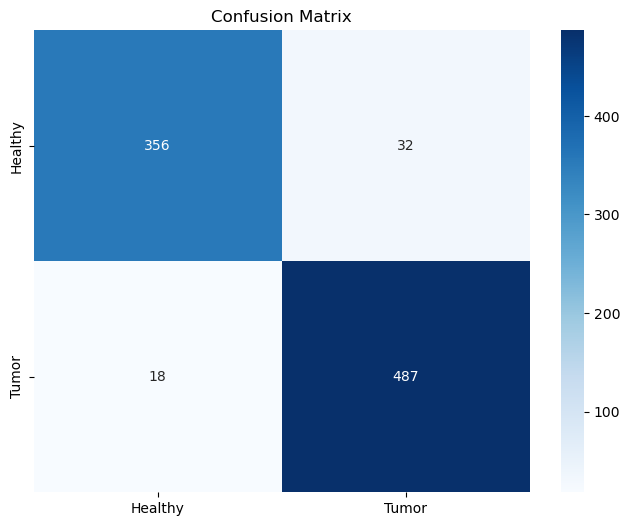

In [9]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Paths to directories
tumor_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
healthy_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"

# Load metadata
metadata = pd.read_csv("D:/anaconda/metadata_rgb_only.csv")

# Load images and labels
def load_images_and_labels(metadata, tumor_dir, healthy_dir):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        if row['class'] == 'tumor':
            img_path = os.path.join(tumor_dir, row['image'])
        else:
            img_path = os.path.join(healthy_dir, row['image'])
        
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(299, 299))  # Resize to match InceptionV3 input
            img = img_to_array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(1 if row['class'] == 'tumor' else 0)
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(metadata, tumor_dir, healthy_dir)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load pretrained InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D to reduce dimensionality
x = Dense(512, activation='relu')(x)  # Suggested number of units
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)  # Additional Dense layer with fewer units
x = Dropout(0.5)(x)  # Additional Dropout layer
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Tumor'], yticklabels=['Healthy', 'Tumor'])
plt.title("Confusion Matrix")
plt.show()
# After training the model, save it to a file
model.save('brain_tumor_classifier.h5')
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('brain_tumor_classifier.h5')

In [11]:
# Function to predict the tumor type for the uploaded image
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability
    predicted_class = unique_labels[class_idx]  # Convert index back to tumor type
    return predicted_class

# Example: Predict on an uploaded image
image_path = "C:/Users/Piyushi Labhe/Downloads/super_resolved_image (10).tiff"
result = predict_image(image_path, model)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


NameError: name 'unique_labels' is not defined

Epoch 1/10


D:\my\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.6732 - loss: 0.7507 - val_accuracy: 0.8835 - val_loss: 0.3186
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.8219 - loss: 0.4045 - val_accuracy: 0.8656 - val_loss: 0.3218
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.8306 - loss: 0.3920 - val_accuracy: 0.9149 - val_loss: 0.2285
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.8544 - loss: 0.3338 - val_accuracy: 0.9115 - val_loss: 0.2240
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1585s 14s/step - accuracy: 0.8692 - loss: 0.3054 - val_accuracy: 0.9295 - val_loss: 0.1996
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1220s 11s/step - accuracy: 0.8912 - loss: 0.2831 - val_accuracy: 0.9104 - val_loss: 0.2363
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1283s 11s/step - accuracy: 0.8871 - loss: 0.2668 - val_accuracy: 0.9395 - val_loss: 0.1782
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 249726s 2235s/step - accuracy: 0.8789 - loss: 0.2866 - val_acc

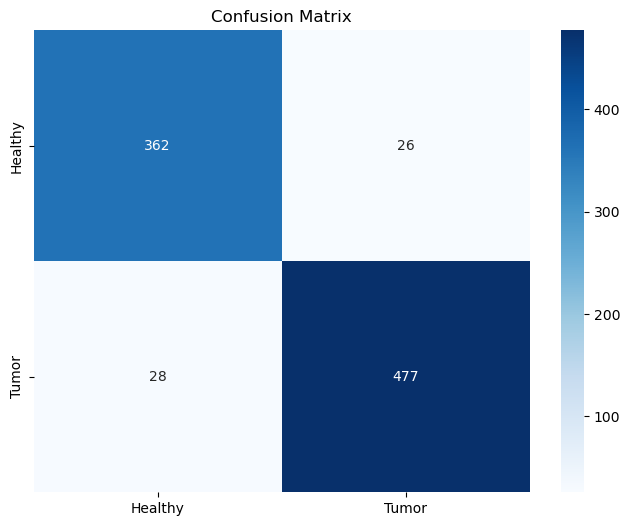

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Prediction: Tumor detected


In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to directories
tumor_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor"
healthy_dir = "D:/anaconda/Brain Tumor Data Set/Brain Tumor Data Set/Healthy"

# Load metadata
metadata = pd.read_csv("D:/anaconda/metadata_rgb_only.csv")

# Load images and labels
def load_images_and_labels(metadata, tumor_dir, healthy_dir):
    images = []
    labels = []
    for _, row in metadata.iterrows():
        if row['class'] == 'tumor':
            img_path = os.path.join(tumor_dir, row['image'])
        else:
            img_path = os.path.join(healthy_dir, row['image'])
        
        if os.path.exists(img_path):
            img = load_img(img_path, target_size=(299, 299))  # Resize to match InceptionV3 input
            img = img_to_array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(1 if row['class'] == 'tumor' else 0)
    return np.array(images), np.array(labels)

# Load images and labels
X, y = load_images_and_labels(metadata, tumor_dir, healthy_dir)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load pretrained InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D to reduce dimensionality
x = Dense(512, activation='relu')(x)  # Suggested number of units
x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)  # Additional Dense layer with fewer units
x = Dropout(0.5)(x)  # Additional Dropout layer
predictions = Dense(2, activation='softmax')(x)  # Output layer for binary classification

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,  # Set epochs to 10
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Save the model in new format
model.save('brain_tumor_model.keras')

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Tumor'], yticklabels=['Healthy', 'Tumor'])
plt.title("Confusion Matrix")
plt.show()

# Function to load and preprocess the uploaded image
def preprocess_image(image_path, target_size=(299, 299)):
    img = load_img(image_path, target_size=target_size)  # Resize the image
    img = img_to_array(img)  # Convert to array
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to predict the class (healthy or tumor) for the uploaded image
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability
    
    # Mapping indices to class names
    if class_idx == 1:
        return "Tumor detected"
    else:
        return "Healthy"

# Test with an example image
image_path = "C:/Users/Piyushi Labhe/Downloads/super_resolved_image (10).tiff"
result = predict_image(image_path, model)
print(f"Prediction: {result}")
